## Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far. 
---

The **Trending Youtube Video Statistics** dataset on [Kaggle](https://www.kaggle.com/datasnaek/youtube-new) includes several months (and counting) of data on daily trending YouTube videos, with up to 200 listed trending videos per day.  Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.  

My analysis is limited to any video based in the US that is within two standard deviations of the average views.  Also, I will analyze category_titles that have an average of 1 million views.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import json
%matplotlib inline
sns.set_style('white')

In [24]:
file = "C:/Users/Carter Carlson/Documents/Thinkful/Large Databases/Youtube/videos.csv"
df = pd.read_csv(file)
variation = np.std(df['views'])
mean = df['views'].mean()
df = df[(df.views > mean - 2*variation) &
        (df.views < mean + 2*variation)]

file2 = 'C:/Users/Carter Carlson/Documents/Thinkful/Large Databases/Youtube/category_id.json'
with open(file2) as data_file:
    data = json.load(data_file)
    
num_list = []
title_list = []
for group in data['items']:
    num = group['id']
    title = group['snippet']['title']
    num_list.append(num)
    title_list.append(title)
    
cat_id_list = dict(zip(num_list, title_list))
df['category_title'] = [cat_id_list[str(i)] for i in df['category_id']]

In [65]:
# Only look at category_titles that had at least an average of 1 million views
avg_views = df.groupby('category_title').mean()
df1 = avg_views.loc[avg_views['views'] > 1000000][['category_id']]

title_list = []
for row in df1['category_id']:
    title_list.append(row)

    
df = df.loc[df['category_id'].isin(title_list),['category_id','views','likes','dislikes','comment_count']]

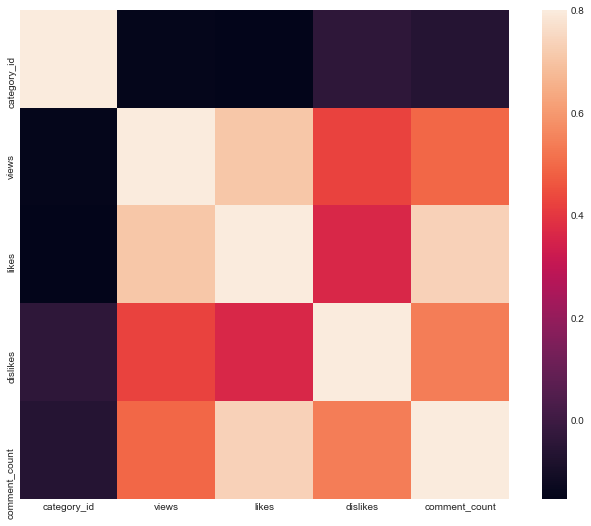

In [66]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0, 250000)

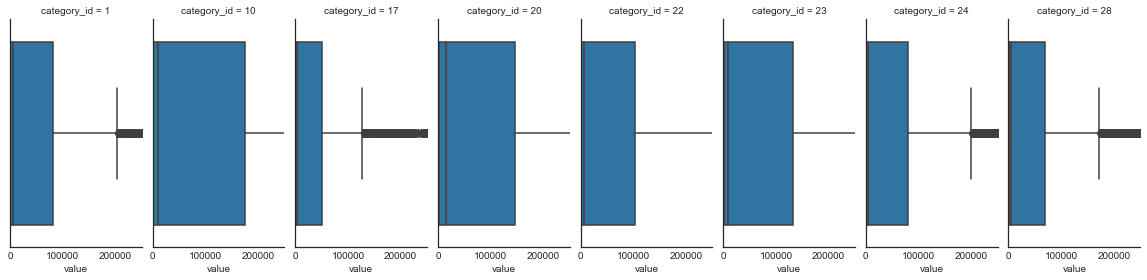

In [98]:
df_box = df
df_box = pd.melt(df_box, id_vars=['category_id'])

g = sns.FacetGrid(df_box, col='category_id', size=4, aspect=.5)
g = g.map(sns.boxplot, 'value')

axes = g.axes
axes[0,0].set_xlim(0,250000)
# How do I organize this vertically?

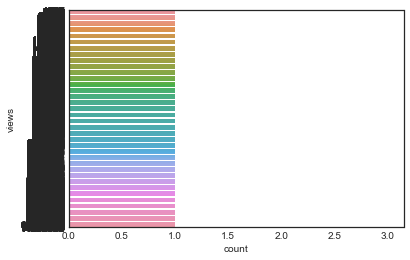

In [100]:
sns.countplot(y='views', data=df)
plt.show()